# Use the structure and attribute to generate an embedding

This notebook takes as inputs the adjacency lists generated from the OpenBEL graph and label maps, from the Open Targets database. It calcultates and compares the performance of the classifications after learning the embeddings using GAT2Vec using different hyperparameters.

## Imports and definitions

In [7]:
import warnings

from GAT2VEC.evaluation.classification import Classification
from GAT2VEC.gat2vec import Gat2Vec
from guiltytargets.constants import gat2vec_config
import pandas as pd
from ppi_network_annotation.parsers import parse_gene_list

from guilty_phewas import utils

dir_ = "/home/mau/Uni/Thesis/gat2vecdemo/GAT2VEC/data/M10"
dir_ = "/home/mau/Uni/Thesis/tau"
dir_ = "C:/Users/Mauricio/Thesis/bel_data/alzh2"  # windows
dir_ = "C:/Users/Mauricio/Thesis/bel_data/alzh"  # windows

# Ignore warnings
warnings.simplefilter('ignore')

## Optimizing the hyperparameters

### The default parameters used in GuiltyTargets

In [2]:
print("Default parameters:")
print(f'num_walks {gat2vec_config.num_walks}\n'
      f'walk_length {gat2vec_config.walk_length}\n'
      f'dimension {gat2vec_config.dimension}\n'
      f'window_size {gat2vec_config.window_size}\n')

Default parameters:
num_walks 10
walk_length 80
dimension 128
window_size 5



### Training using the default parameters

In [8]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

model = g2v.train_gat2vec(
        gat2vec_config.num_walks,
        gat2vec_config.walk_length,
        gat2vec_config.dimension,
        gat2vec_config.window_size,
        output=True,
    )
classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished


In [9]:
print(f"#### Initial values ####")
print(auc_df)

#### Initial values ####
    accuracy   f1micro   f1macro       auc
TR                                        
0   0.993822  0.993822  0.498451  0.691987
1   0.993822  0.993822  0.498451  0.673563
2   0.993822  0.993822  0.498451  0.688629
3   0.993822  0.993822  0.498451  0.673782
4   0.993822  0.993822  0.498451  0.689053
5   0.993822  0.993822  0.498451  0.669909
6   0.993822  0.993822  0.498451  0.669445
7   0.993822  0.993822  0.498451  0.674500
8   0.993822  0.993822  0.498451  0.669651
9   0.993822  0.993822  0.498451  0.687887


### Optimizing Number of Walks

In [10]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

optmization = pd.DataFrame()
num_walks_list = [2, 5, gat2vec_config.num_walks, 20, 30, 40]

for nw in num_walks_list:
    print(f'# Training num walks {nw}')
    model = g2v.train_gat2vec(
            nw,
            gat2vec_config.walk_length,
            gat2vec_config.dimension,
            gat2vec_config.window_size,
            output=True,
        )
    classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
    auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")
    optmization.loc[:, f'num_walks {nw}'] = auc_df['auc']

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
# Training num walks 2
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training num walks 5
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training num walks 10
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training num walks 20
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training num walks 30
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representati

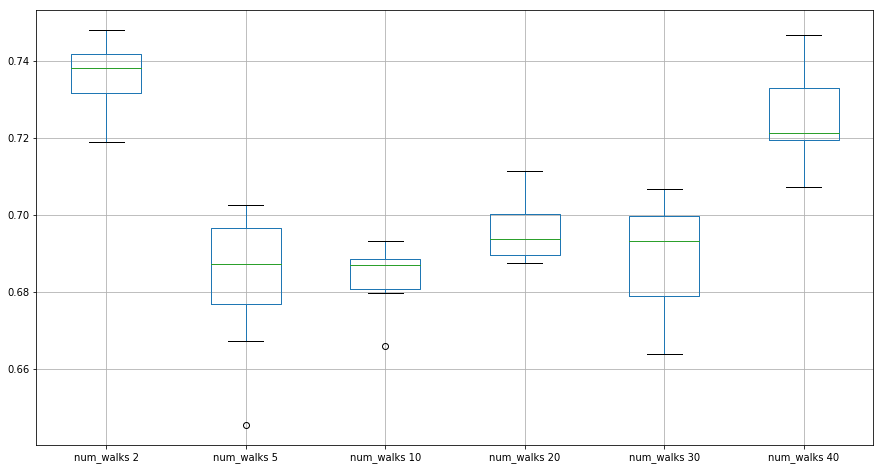

In [16]:
optmization.boxplot(figsize=[15, 8]);

### Optimizing Walk Length

In [17]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

num_walks = 30
walk_length_list = [4, 20, 40, gat2vec_config.walk_length, 120, 160]

optmization = pd.DataFrame()

for wl in walk_length_list:
    print(f'# Training walk length {wl}')
    model = g2v.train_gat2vec(
            num_walks,
            wl,
            gat2vec_config.dimension,
            gat2vec_config.window_size,
            output=True,
        )
    classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
    auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")
    optmization.loc[:, f'walk_length {wl}'] = auc_df['auc']

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
# Training walk length 4
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 20
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 40
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 80
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 120
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned 

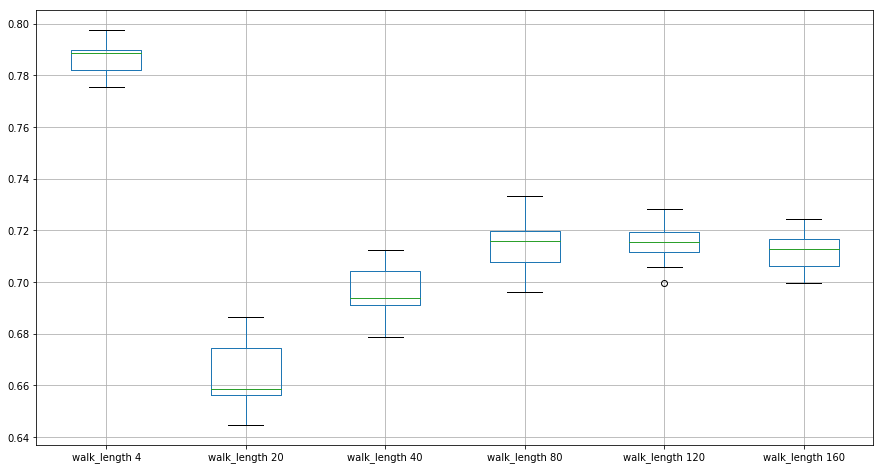

In [18]:
# using nw = 30
optmization.boxplot(figsize=[15, 8]);

In [19]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

num_walks = 2
# walk_length_list = [4, 20, 40, gat2vec_config.walk_length, 120, 160]

optmization2 = pd.DataFrame()

for wl in walk_length_list:
    print(f'# Training walk length {wl}')
    model = g2v.train_gat2vec(
            num_walks,
            wl,
            gat2vec_config.dimension,
            gat2vec_config.window_size,
            output=True,
        )
    classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
    auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")
    optmization.loc[:, f'nw 2 wl {wl}'] = auc_df['auc']
    optmization2.loc[:, f'walk_length {wl}'] = auc_df['auc']

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
# Training walk length 4
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 20
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 40
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 80
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training walk length 120
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned 

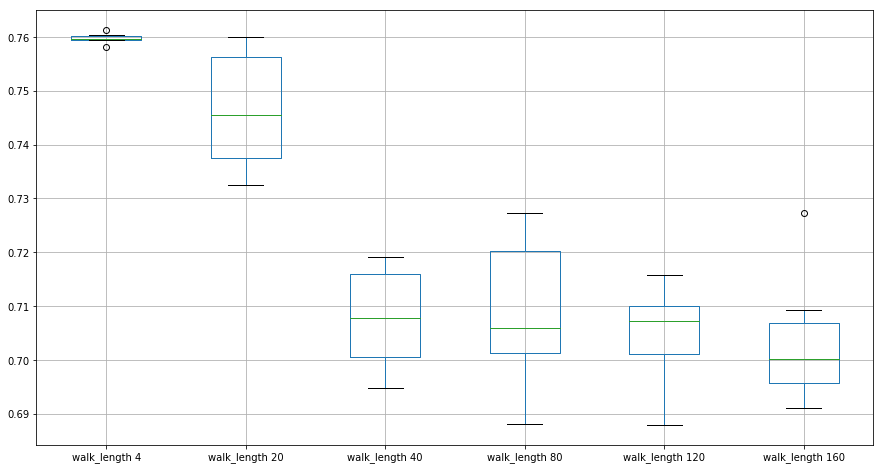

In [21]:
optmization2.boxplot(figsize=[15, 8]);

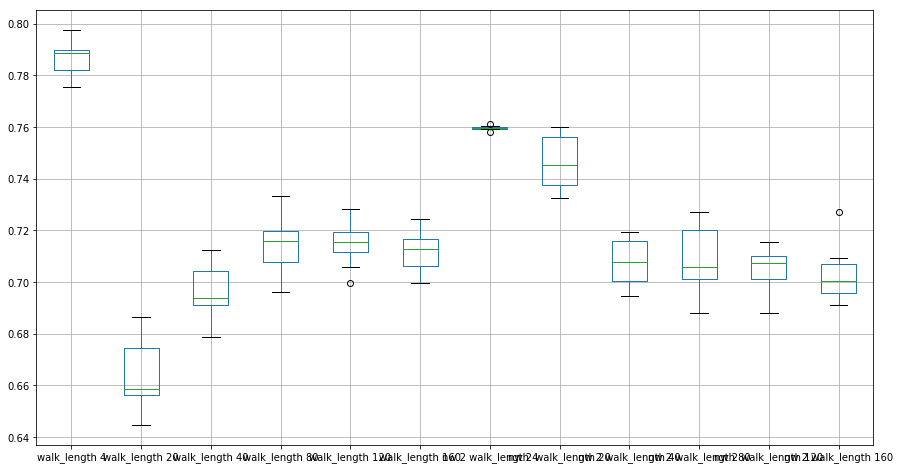

In [20]:
# comparing nw = 2 and nw = 30
optmization.boxplot(figsize=[15, 8]);

### Optimizing Window Size

In [24]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

num_walks = 30
walk_length = 4
window_size_list = [2, gat2vec_config.window_size, 10, 20, 30]

optmization = pd.DataFrame()

for ws in window_size_list:
    print(f'# Training window size {ws}')
    model = g2v.train_gat2vec(
            num_walks,
            walk_length,
            gat2vec_config.dimension,
            ws,
            output=True,
        )
    classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
    auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")
    optmization.loc[:, f'window_size {ws}'] = auc_df['auc']

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
# Training window size 2
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training window size 5
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training window size 10
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training window size 20
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training window size 30
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Re

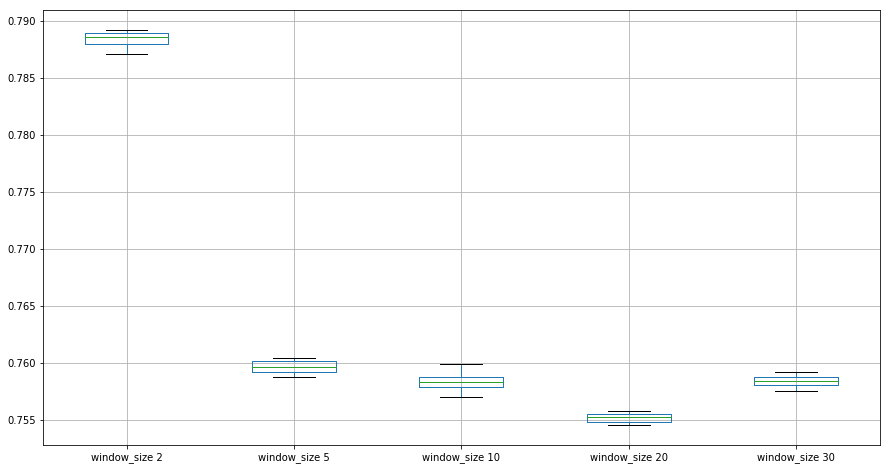

In [23]:
# NW = 2
optmization.boxplot(figsize=[15, 8]);

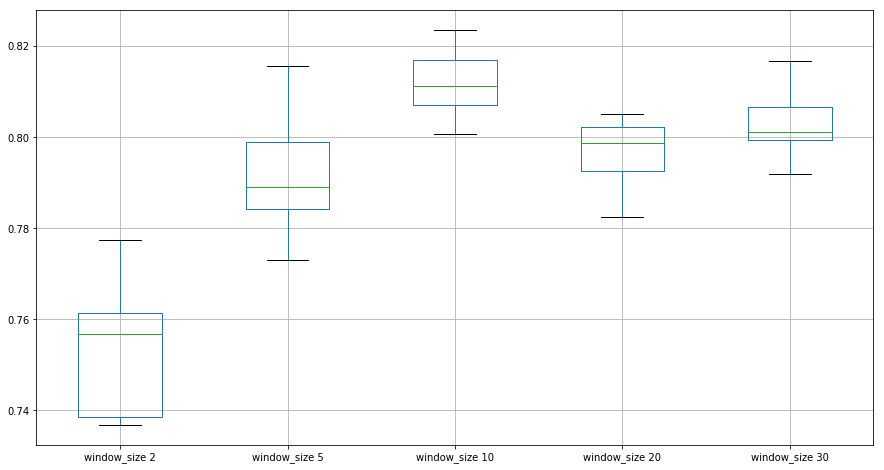

In [25]:
# NW = 30
optmization.boxplot(figsize=[15, 8]);

### Optimizing Number of Dimensions

In [27]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

num_walks = 30
walk_length = 4
window_size = 10
dimension_list = [32, 64, gat2vec_config.dimension, 256, 512]

optmization = pd.DataFrame()

for dim in dimension_list:
    print(f'# Training dimension {dim}')
    model = g2v.train_gat2vec(
            num_walks,
            walk_length,
            dim,
            window_size,
            output=True,
        )
    classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
    auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")
    optmization.loc[:, f'dimension {dim}'] = auc_df['auc']

Initializing gat2vec
loading structural graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_graph.adjlist
Number of nodes: 20720
loading attribute graph
C:/Users/Mauricio/Thesis/bel_data/alzh\alzh_na.adjlist
Number of nodes: 20720
# Training dimension 32
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training dimension 64
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training dimension 128
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training dimension 256
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Representation Saved
Training Finished
# Training dimension 512
Random Walks on Structural Graph
Random Walks on Attribute Graph
Learning Representation
Learned Represe

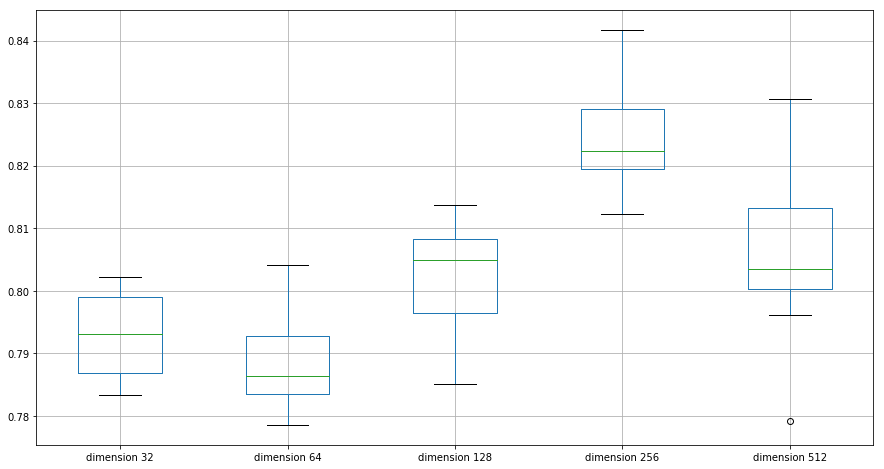

In [28]:
optmization.boxplot(figsize=[15, 8]);

## Results after optimization

In [ ]:
g2v = Gat2Vec(dir_, dir_, label=False, tr=gat2vec_config.training_ratio)

walk_length = 4
num_walks = 30
window_size = 10
dimension = 256

model = g2v.train_gat2vec(
        num_walks,
        walk_length,
        dimension,
        window_size,
        output=True,
    )
classifier = Classification(dir_, dir_, tr=gat2vec_config.training_ratio)
auc_df = classifier.evaluate(model, label=False, evaluation_scheme="cv")
print(auc_df)


## Print the probabilities 

In [ ]:
probs_df = pd.DataFrame(classifier.get_prediction_probs_for_entire_set(model))

print(probs_df)